# Notebook for demonstration of data split and cross-validation

## 1. Introduction
This notebook provides an introduction to linear regression. We will create a synthetic dataset, fit a linear regression model, and evaluate its performance in four different scenarios:
1. Without splitting the data
2. With data split into training and testing sets
3. Using cross-validation
4. Comparing different numbers of folds in cross-validation

## 2. Importing Libraries

In [ ]:
import numpy as np #Importa biblioteca matemática
import pandas as pd #Importa biblioteca para a manipulação e análise de dados.
import matplotlib.pyplot as plt #Importa biblioteca de plotagem para criar gráficos.
from sklearn.linear_model import LinearRegression #Importa classe usada para criar e treinar modelos de regressão linear.
from sklearn.model_selection import train_test_split, cross_val_score #Importa duas funções para dividir e revalidar os conjuntos de dados
from sklearn.metrics import mean_squared_error, r2_score #Importa funções para calcular o MSE e R².

## 3. Creating the Synthetic Dataset
Defining the size of the dataset.

In [ ]:
# Generating random data
n_samples = 100 #Define o número de amostras a serem geradas.
np.random.seed(42) #Define a semente para o gerador de números aleatórios.
X = 2 * np.random.rand(n_samples, 1) #Gera uma matriz 100x1 de variaveis independentes.
y = 4 + 3 * X + np.random.randn(n_samples, 1) #Gera a variável dependente y usando uma relação linear com X.

# Creating a DataFrame
data = pd.DataFrame(data=np.hstack((X, y)), columns=['Feature', 'Target']) #Cria um Dataframe concatenando as matrizes x e y.

# Displaying the first few rows of the dataset
data.head() #Exibe as primeiras 5 linhas do DataFrame data.

,Feature,Target
0,0.749080,6.334288
1,1.901429,9.405278
2,1.463988,8.483724
3,1.197317,5.604382
4,0.312037,4.716440


## 4. Exploratory Data Analysis (EDA)
Visualising the relationship between Feature and Target.

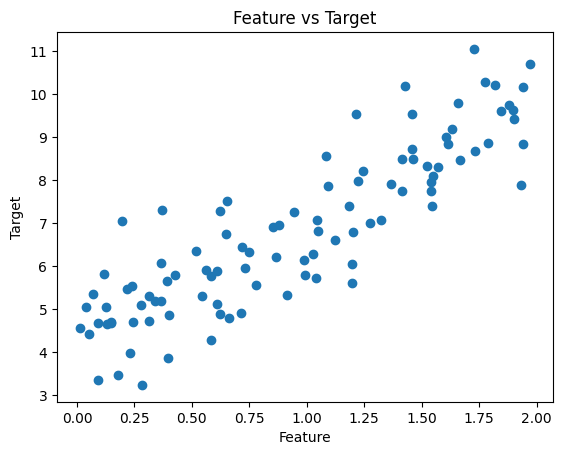

In [ ]:
plt.scatter(data['Feature'], data['Target']) #Cria um gráfico de dispersão "Feature"x"Target"
plt.xlabel('Feature') #Define o rótulo (label) do eixo x como 'Feature'
plt.ylabel('Target') #Define o rótulo (label) do eixo y como 'Target'
plt.title('Feature vs Target') #Define o título do gráfico como 'Feature vs Target'
plt.show()#Exibe o gráfico na tela.

## 5. Scenario 1: Without Splitting the Data

In [ ]:
# Training the Linear Regression Model
model = LinearRegression() #Cria uma instância da classe que representa um modelo de regressão linear.
model.fit(data[['Feature']], data['Target']) #Treina (ou ajusta) o modelo de regressão linear aos dados.

LinearRegression()

In [ ]:
# Evaluating the Model
y_pred = model.predict(data[['Feature']])#Usa o modelo treinado para prever os valores da variável dependente
mse1 = mean_squared_error(data['Target'], y_pred)#Calcula o erro quadrático médio (MSE)
r2_1 = r2_score(data['Target'], y_pred)#Calcula o coeficiente de determinação (R²)
print(f'Scenario 1 - MSE: {mse1}')#imprime o valor do erro quadrático médio (MSE)
print(f'Scenario 1 - R²: {r2_1}')#Imprime o valor do coeficiente de determinação (R²)

Scenario 1 - MSE: 0.8065845639670531
Scenario 1 - R²: 0.7692735413614223


## 6. Scenario 2: Splitting the Data into Training and Testing Sets

In [ ]:
# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(data[['Feature']], data['Target'], test_size=0.2, random_state=42)
#Define que 20% dos dados serão reservados para o conjunto de teste e 80% para o conjunto de treino.
# Training the Linear Regression Model
model = LinearRegression()#Cria uma nova instância do modelo de regressão linear.
model.fit(X_train, y_train)#Treina o modelo de regressão linear usando o conjunto de dados de treino.

LinearRegression()

In [ ]:
# Evaluating the Model on Training Data
y_train_pred = model.predict(X_train)#Usa o modelo treinado para prever os valores da variável dependente
mse2_train = mean_squared_error(y_train, y_train_pred)#Calcula o erro quadrático médio (MSE)
r2_2_train = r2_score(y_train, y_train_pred)#Calcula o coeficiente de determinação (R²)
print(f'Scenario 2 - Training MSE: {mse2_train}')#Imprime o valor do erro quadrático médio (MSE) calculado para o conjunto de treino.
print(f'Scenario 2 - Training R²: {r2_2_train}')#Imprime o valor do coeficiente de determinação (R²) calculado para o conjunto de treino.

Scenario 2 - Training MSE: 0.8476788564209705
Scenario 2 - Training R²: 0.7582381034538057


In [ ]:
# Evaluating the Model on Testing Data
y_test_pred = model.predict(X_test)#Usa o modelo treinado para prever os valores da variável dependente
mse2_test = mean_squared_error(y_test, y_test_pred)#Calcula o erro quadrático médio (MSE)
r2_2_test = r2_score(y_test, y_test_pred)#Calcula o coeficiente de determinação (R²)
print(f'Scenario 2 - Testing MSE: {mse2_test}')#Imprime o valor do erro quadrático médio (MSE) calculado para o conjunto de teste.
print(f'Scenario 2 - Testing R²: {r2_2_test}')#Imprime o valor do coeficiente de determinação (R²) calculado para o conjunto de teste.

Scenario 2 - Testing MSE: 0.6536995137170021
Scenario 2 - Testing R²: 0.8072059636181392


## 7. Scenario 3: Using Cross-Validation

In [ ]:
# Cross-Validation
cv_mse = -cross_val_score(model, data[['Feature']], data['Target'], cv=5, scoring='neg_mean_squared_error')#Executa a validação cruzada
cv_r2 = cross_val_score(model, data[['Feature']], data['Target'], cv=5, scoring='r2')#Calcula o coeficiente de determinação (R²) para cada fold na validação cruzada.

# Evaluating the Model
mse3 = cv_mse.mean()#Calcula a média dos valores de MSE obtidos em cada fold da validação cruzada.
r2_3 = cv_r2.mean()#Calcula a média dos valores de R² obtidos em cada fold da validação cruzada.
print(f'Scenario 3 - MSE: {mse3}')#Imprime a média do erro quadrático médio (MSE) obtida na validação cruzada.
print(f'Scenario 3 - R²: {r2_3}')#Imprime a média do coeficiente de determinação (R²) obtido na validação cruzada.


Scenario 3 - MSE: 0.8534764258097833
Scenario 3 - R²: 0.7439885140164489


## 8. Scenario 4: Comparing Different Numbers of Folds in Cross-Validation

In [ ]:
# Comparing different numbers of folds in cross-validation
folds = [3, 5, 10, 20]#Cria uma lista com diferentes valores de cv (número de folds).
mse_scores = []
r2_scores = []
#Inicializa duas listas vazias para armazenar as MSE e dos R² para cada valor de cv.
for k in folds:#Inicia um loop que itera sobre cada valor de k na lista folds.
    cv_mse = -cross_val_score(model, data[['Feature']], data['Target'], cv=k, scoring='neg_mean_squared_error')#calcula o MSE para cada fold
    cv_r2 = cross_val_score(model, data[['Feature']], data['Target'], cv=k, scoring='r2')#calcula o R² para cada fold
    mse_scores.append(cv_mse.mean()) #Calcula a média dos MSEs obtidos
    r2_scores.append(cv_r2.mean()) #Calcula a média dos R² obtidos
    print(f'{k}-fold CV - MSE: {cv_mse.mean()}')#imprime a média dos MSEs obtidos
    print(f'{k}-fold CV - R²: {cv_r2.mean()}')#mprime a média dos R² obtidos

3-fold CV - MSE: 0.8548270894340909
3-fold CV - R²: 0.7525550156455565
5-fold CV - MSE: 0.8534764258097833
5-fold CV - R²: 0.7439885140164489
10-fold CV - MSE: 0.8493881913180678
10-fold CV - R²: 0.7196196932113306
20-fold CV - MSE: 0.836495465526695
20-fold CV - R²: 0.4905080647183519


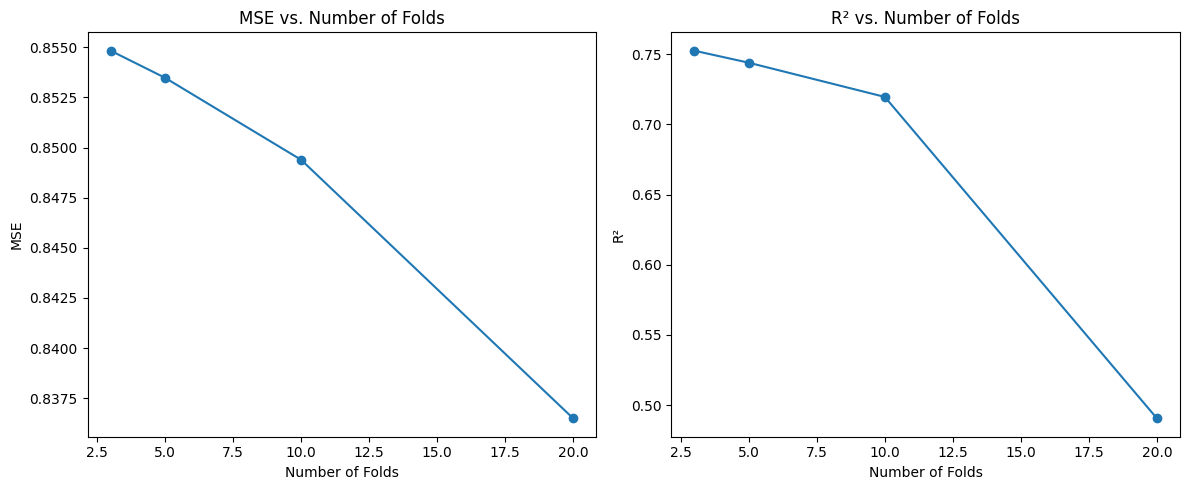

In [ ]:
# Plotting the results
plt.figure(figsize=(12, 5))#Cria uma nova figura com o tamanho especificado

plt.subplot(1, 2, 1)#Cria o primeiro subplot em uma grade de 1 linha por 2 colunas
plt.plot(folds, mse_scores, marker='o')#Plota os valores de MSE (mean squared error) em relação ao número de folds.
plt.title('MSE vs. Number of Folds')#Define o título do primeiro gráfico como 'MSE vs. Number of Folds'.
plt.xlabel('Number of Folds')#Define o título do primeiro gráfico como 'MSE vs. Number of Folds'.
plt.ylabel('MSE')#Define o rótulo do eixo y do primeiro gráfico como 'MSE'.

plt.subplot(1, 2, 2)#Cria o segundo subplot na mesma grade de 1 linha por 2 colunas.
plt.plot(folds, r2_scores, marker='o')#Plota os valores de R² em relação ao número de folds.
plt.title('R² vs. Number of Folds')#Define o título do segundo gráfico como 'R² vs. Number of Folds'.
plt.xlabel('Number of Folds')#Define o rótulo do eixo x do segundo gráfico como 'Number of Folds'.
plt.ylabel('R²')#Define o rótulo do eixo y do segundo gráfico como 'R²'.

plt.tight_layout()#Ajusta o layout dos subplots para garantir que não haja sobreposição.
plt.show()#Exibe os gráficos na tela.


## 9. Comparison of All Scenarios

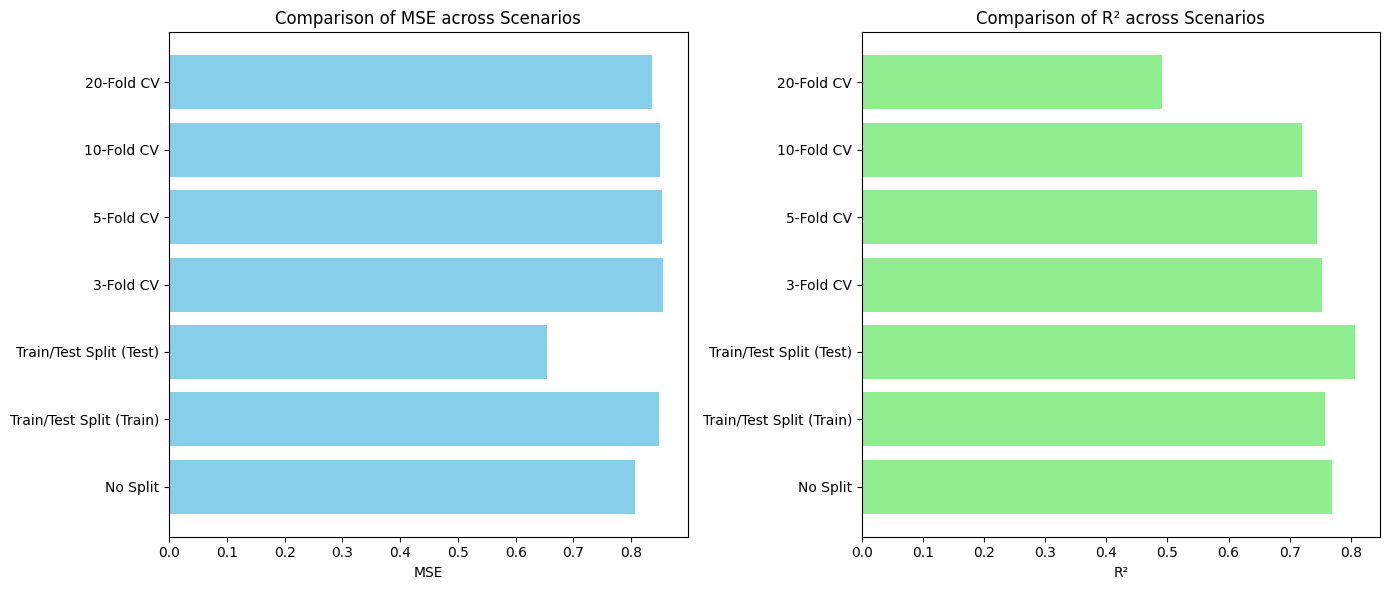

In [ ]:
# Comparing all scenarios
scenarios = ['No Split', 'Train/Test Split (Train)', 'Train/Test Split (Test)', '3-Fold CV', '5-Fold CV', '10-Fold CV', '20-Fold CV']#Define uma lista com rótulos para os diferentes cenários de avaliação do modelo
mse_all = [mse1, mse2_train, mse2_test] + mse_scores#Cria uma lista com os valores de MSE para todos os cenários
r2_all = [r2_1, r2_2_train, r2_2_test] + r2_scores#Cria uma lista com os valores de R² para todos os cenários.

# Plotting the comparison
plt.figure(figsize=(14, 6))#Cria uma nova figura com o tamanho especificado
plt.subplot(1, 2, 1)#Cria o primeiro subplot em uma grade de 1 linha por 2 colunas.
plt.barh(scenarios, mse_all, color='skyblue')#Plota um gráfico de barras horizontais para os valores de MSE em relação aos diferentes cenários.
plt.xlabel('MSE')#Rotulo eixo x
plt.title('Comparison of MSE across Scenarios')#Define o titulo

plt.subplot(1, 2, 2)
plt.barh(scenarios, r2_all, color='lightgreen')#Plota um gráfico de barras horizontais para os valores de R² em relação aos diferentes cenários.
plt.xlabel('R²')#Rotulo eixo x
plt.title('Comparison of R² across Scenarios')#Define o titulo

plt.tight_layout()#Ajusta o layout dos subplots
plt.show()#Exibe os gráficos na tela.


Comparação de MSE: O gráfico de barras horizontais mostra como o MSE varia entre os diferentes cenários de avaliação. Isso ajuda a identificar se o modelo tem um desempenho consistente ou se é sensível ao método de validação.

Comparação de R²: O gráfico de barras horizontais mostra como o R² varia entre os diferentes cenários de avaliação. Um R² mais alto indica que o modelo é melhor em explicar a variabilidade dos dados.

## 10. Conclusão
Neste notebook, criamos um conjunto de dados sintético e ajustamos um modelo de regressão linear. Avaliamos o desempenho do modelo usando MSE e R² em quatro cenários diferentes:

1.Sem Dividir os Dados: Avaliamos o modelo usando o conjunto de dados completo.

2.Com Dados Divididos em Conjuntos de Treino e Teste: Avaliamos o desempenho nos subconjuntos de treino e teste.

3.Usando Validação Cruzada: Implementamos a validação cruzada para obter uma estimativa robusta do desempenho.

4.Comparando Diferentes Números de Folds na Validação Cruzada: Analisamos como a variação no número de folds afeta o desempenho do modelo.

Finalmente, comparamos os resultados de todos os cenários para entender o impacto dos diferentes métodos de avaliação e números de folds no desempenho do modelo.